# Assessment Project

**Author:** Mark Cotter
**Email:**  g00376335@gmit.ie

This is my assessment project jupyter notebook for the GMIT module Machine Learning and Statistics. This notebook is used to review and model the dataset 'powerproduction.txt' included in this repository. The dataset includes wind speed values with associated wind turbine output values.

***

## Project Plan

* Load the dataset into the jupyter notebook
* **Undertake initial review of the dataset**
* Look through the data. Use data sorting and plotting to get a feel for the data content
* Clean the dataset removing any erroneous or duplicate data that might skew a model trained on the dataset
* Investigate data content
* Review findings of dataset investigation
* Decide what type of the model to fit sigmoid relationship
* **Sigmoid curve fitting model**
* Divide the dataset into a training and testing data sets using 70%:30% split
* Normalise the known dataset power output for sigmoid function in range 0 to 1
* Create a function to return the sigmoid power output for inputted wind speed
* Apply curve fitting to the training dataset
* Test the curve fitting model
* Display plots of the known and predicted output data using the model
* **Keras models**
* Create a normalised version of the data input and output that lies approximately between 0 and 1
* Divide the cleaned dataset into training and testing sets using 70%:30% split
* Use Keras [7] to train neural network models on the training datasets
* Test the trained models on the test dataset
* Display plots of the known and predicted output data
* Create a function based on the model that returns power output for inputted wind speed
* Save the Keras model to H5 files in the repository
* **Web service**
* Create python server script to provide web service for the trained model
* Create html user interface to provide a front end for the python server and serve out the trained model
* Create Dockerfile to build and run the web service in a container

***

## Import Modules and Dataset

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import sklearn.model_selection as skms
import sklearn.preprocessing as skpp
import sklearn.metrics as skme
import tensorflow.keras as kr
import h5py

# Set Pyplot settings. Code adapted from https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-colorblind")
plt.rcParams['figure.figsize'] = [14,8]

# Set pandas dataframes to display all rows. Code adapted from
# https://stackoverflow.com/a/51593236
#pd.set_option('display.max_rows', 500)

# import text file of csv data as dataframe. Code adapted from 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv('powerproduction.txt') 

***

## Initial Review of Dataset

### Imported Dataset

In [2]:
# Display dataframe
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


### Dataset Description

In [3]:
# Describe basic stats of the data
df.describe().round(2)

,speed,power
count,500.00,500.00
mean,12.59,48.01
std,7.22,41.61
min,0.00,0.00
25%,6.32,5.29
50%,12.55,41.65
75%,18.78,93.54
max,25.00,113.56


### Dataset Scope

The imported base dataset file **powerproduction.txt** contains 500 observations with two variables speed and power. The project brief identifies these variables as wind **speed** and wind turbine **power** output. The measurement units of the variables are not mentioned.
Based on the range of wind speed values, the speed units appear to be metres/second (m/s) ranging from no wind (0 m/s) to whole gale force (25 m/s) [2].
Based on the range of power outputs, the power units appear to be in Kilowatts (kW) ranging from 0 kW to 113.556 kW [2].

The power output could also be measured in the term of Kilowatts Hours (kWh), if the wind speed is the average wind speed measured over an hour. For the purpose of this assessment, the measured wind speed and power output are taking to be instantaneous measurements using m/s and kW [3].


### Illustrative plot of Imported Data
The following is an illustrative plot of the imported data.

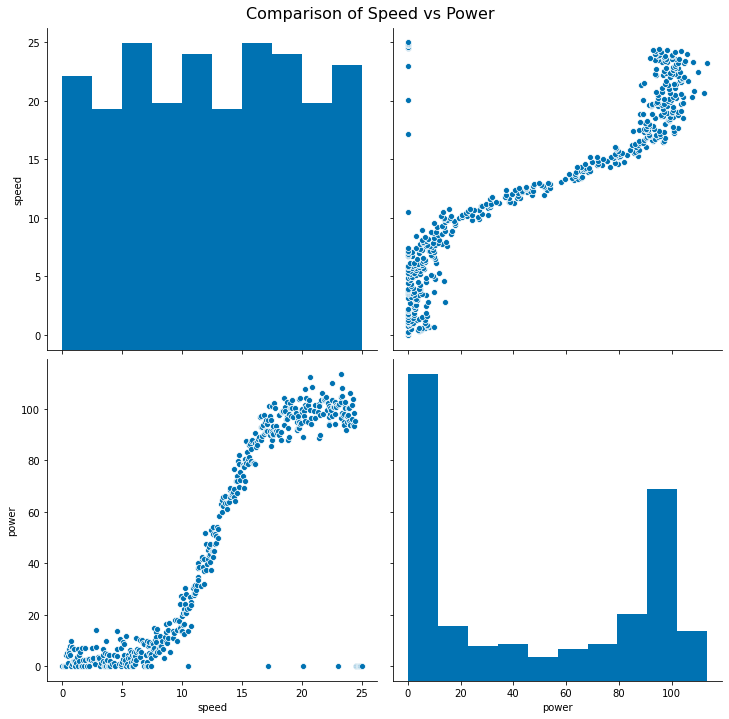

In [4]:
# Plot data comparisons of data. Code adapted from
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
plot = sns.pairplot(df, height=5)
# Add Title Code adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Comparison of Speed vs Power", fontsize = 16)
plt.show()

### Sorted Dataset Investigation

The following review of sorted data was undertaken.

#### Upper and lower sorted wind speed groups

In [5]:
# Data sorted by speed and display selections at the low and high speeds. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
print("Low wind speed data group")
df.sort_values(by=['speed']).head(15)

Low wind speed data group


,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [6]:
print("High wind speed data group")
df.sort_values(by=['speed']).tail(15)

High wind speed data group


,speed,power
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117
490,24.499,0.000
491,24.525,0.000
492,24.575,0.000
493,24.650,0.000
494,24.750,0.000


#### Upper and lower sorted power output groups

In [7]:
# Data sorted by power and display selections of the low and high power outputs
print("Low power output data group")
df.sort_values(by=['power']).head(10)

Low power output data group


,speed,power
0,0.000,0.0
111,5.806,0.0
110,5.781,0.0
105,5.556,0.0
89,4.880,0.0
83,4.429,0.0
75,3.879,0.0
74,3.804,0.0
73,3.779,0.0
70,3.679,0.0


In [8]:
print("High power output data group")
df.sort_values(by=['power']).tail(10)

High power output data group


,speed,power
460,23.248,104.655
465,23.373,104.977
481,24.024,105.992
431,21.672,106.208
410,20.295,107.584
464,23.348,108.167
420,20.871,108.485
447,22.497,109.932
416,20.646,112.362
461,23.273,113.556


#### Data group with zero power output

In [9]:
# Display data points with zero kW power and sort by speed
print("Data points with zero kW power output sorted by wind speed")
df.loc[(df['power'] == 0.000)].sort_values(by=['speed'])

Data points with zero kW power output sorted by wind speed


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


### Sorted Dataset Review
There appears to be a number of abnormal outlier dataset observations with zero kW power values. These observations are mostly in the low wind speed range, but also include a few medium and high wind speeds ranges.

The sorted dataset values indicate that power output is zero kW for the ten observations with speed greater or equal to 24.499 m/s. This speed is considered to be a "whole gale" force on the Beaufort scale that can uprooted trees and cause considerable damage to buildings [2]. This suggests that power generation is stopped at this cut-out speed [11] for safety reasons when the wind speed is too high and avoid possible damaging to the wind turbine [3]. A number of other random data points in the low and medium speed range with zero kW power output are possibly related to when the turbine is shut down for operational and maintenance purposes or if no wind is present[2].

***

## Dataset Cleansing

For analytic modelling purposes, these erroneous zero kW power data points should be omitted from the dataset, as they do not appear to follow the natural relationship between wind speed and turbine power output. Other dataset cleaning technique include checking for and omitting duplicate values [5].

### Dataset Cleansing  - Stage 1
Remove outlier data group with power output of zero kW.

In [10]:
# Remove outlier observations rows where power == 0.000
df = df.loc[(df['power'] > 0.0)]

#### Dataset Cleansing  - Stage 1 Summary

In [11]:
# Descibe updated basic stats of the dataset
df.describe().round(2)

,speed,power
count,451.00,451.00
mean,13.00,53.23
std,6.84,40.52
min,0.32,0.07
25%,7.34,8.54
50%,13.04,58.17
75%,18.78,94.73
max,24.40,113.56


### Dataset Cleansing  - Stage 2

Check and remove duplicate data observations.

In [12]:
# Count remaining unique data observation. Code adapted from https://pyformat.info/ &
# https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
print(f"The number of unique speed value observations is {len(df.speed.unique())}")
print(f"The number of unique power value observations is {len(df.power.unique())}")

The number of unique speed value observations is 451
The number of unique power value observations is 450


#### Display duplicate observations found

In [13]:
# Display duplicate power observation found
# Code adapted from https://stackoverflow.com/a/54050797
df[df[['power']].duplicated() == True]

,speed,power
357,17.843,91.27


In [14]:
# Print duplicate power observations found
df.loc[(df['power'] == 91.27)]

,speed,power
338,17.117,91.27
357,17.843,91.27


#### Review duplicate value wind speed range

In [15]:
# Check wind speed observation that give power output between 90.0 kW and 93.0 kW.
# and sort by power values. Code adapted from https://stackoverflow.com/a/41281750
print("wind speed that give power output in range 90.0 kW to 93.0 kW")
df.loc[(df['power'] > 90.0) & (df['power'] < 93.0)].sort_values(by=['power'])

wind speed that give power output in range 90.0 kW to 93.0 kW


,speed,power
352,17.593,90.142
330,16.792,90.171
317,16.091,90.412
350,17.543,90.435
358,17.893,90.546
363,18.268,90.751
332,16.917,90.761
348,17.492,91.125
344,17.367,91.206
357,17.843,91.270


#### Review of duplicate observations

The two wind speeds that have observed duplicate power output of 91.27 kW are of similar scale (17.117 and 17.843). Other  similar power output observations have similar variations in wind speed. Wind always fluctuates and can never be measured exactly [6]. As such it does not appear matter which of the duplicate observations should be retained or removed.

I decided to retain the first observation (index 338) and drop the second duplicate observation (index 357).

#### Remove duplicate observations

In [16]:
# Drop duplicates values be keep the first value. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
df = df.drop_duplicates(subset=['power'], keep='first')

#### Dataset Cleansing  - Stage 2 Summary

In [17]:
# Decribed the cleaned data
print("Basic statistics of the cleaned dataset")
df.describe().round(2)

Basic statistics of the cleaned dataset


,speed,power
count,450.00,450.00
mean,12.99,53.15
std,6.84,40.53
min,0.32,0.07
25%,7.33,8.51
50%,13.01,56.12
75%,18.79,94.75
max,24.40,113.56


After initial review and cleaning of the dataset [5], 450 of the original 500 dataset observations remain.

***

## Investigate Dataset content

### Display plot of cleaned dataset

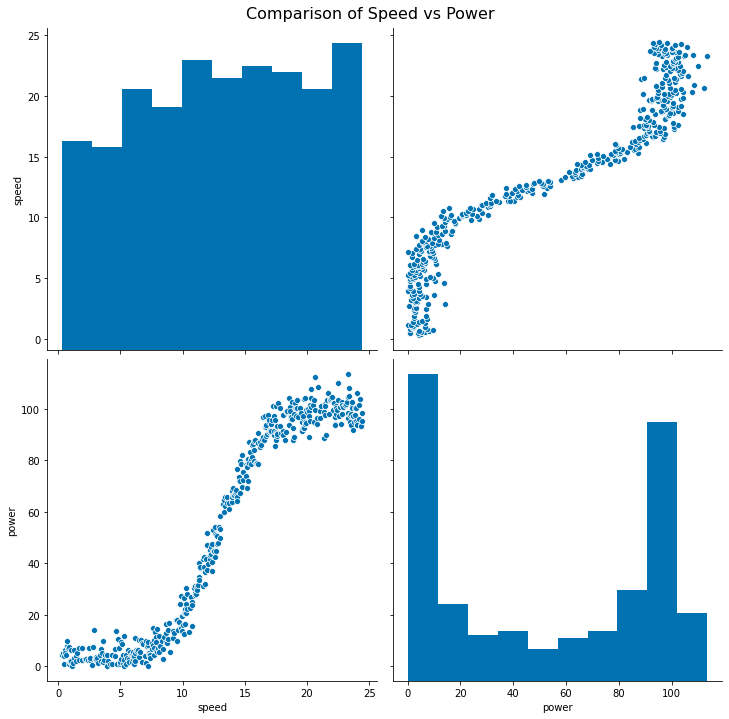

In [18]:
# Replot data comparison 
plot = sns.pairplot(df, height=5)
# Add Title 
plt.subplots_adjust(top=0.95)
plt.suptitle("Comparison of Speed vs Power", fontsize = 16)
plt.show()

### Descriptions of wind speed observation ranges

#### Low wind speed ranges

In [19]:
# Describe low wind speed data points
low_speed = df.loc[(df['speed'] <= 8.0)]
print("Basic statistics of low wind speed range (less than 8m/s)")
low_speed.describe().round(2)

Basic statistics of low wind speed range (less than 8m/s)


,speed,power
count,128.00,128.00
mean,4.39,5.04
std,2.37,3.42
min,0.32,0.07
25%,2.46,2.28
50%,4.84,4.40
75%,6.37,7.05
max,7.93,14.79


#### Medium wind speed ranges

In [20]:
# Describe medium wind speed data points.
med_speed = df.loc[(df['speed'] > 8.0) & (df['speed'] < 18.0)]
print("Basic statistics of medium wind speed range (greater than 8m/s and less than 18m/s)")
med_speed.describe().round(2)

Basic statistics of medium wind speed range (greater than 8m/s and less than 18m/s)


,speed,power
count,193.00,193.00
mean,13.18,54.67
std,2.85,29.72
min,8.03,3.00
25%,10.74,27.69
50%,12.99,54.08
75%,15.67,82.15
max,17.89,102.32


#### High wind speed ranges

In [21]:
# Describe high wind speed data points
high_speed = df.loc[(df['speed'] >= 18.0)]
print("Basic statistics of high wind speed range (greater than 18m/s)")
high_speed.describe().round(2)

Basic statistics of high wind speed range (greater than 18m/s)


,speed,power
count,129.00,129.00
mean,21.24,98.61
std,1.93,4.88
min,18.04,87.98
25%,19.62,95.01
50%,21.32,98.79
75%,23.02,101.42
max,24.40,113.56


#### Wind speed range Summary

In [22]:
# Count low medium and high wind speed ranges. Code adapted from
# https://www.kite.com/python/answers/how-to-count-the-number-of-rows-in-a-pandas-dataframe-in-python
df_cnt = len(df.index)
low_s_cnt = len(low_speed.index)
med_s_cnt = len(med_speed.index)
high_s_cnt = len(high_speed.index)

# Print % of low medium and high wind speed ranges.
# Code adapted from https://pyformat.info/
print("The percentage of observations in low, medium and high wind speed data groups are as follows:")
print(f"Low speed range: 0 to 8 m/s = {(low_s_cnt/df_cnt)*100:.1f}%")
print(f"Medium speed range: 8 to 18 m/s = {(med_s_cnt/df_cnt)*100:.1f}%")
print(f"High speed range: 18 to 24.5 m/s = {(high_s_cnt/df_cnt)*100:.1f}%")

The percentage of observations in low, medium and high wind speed data groups are as follows:
Low speed range: 0 to 8 m/s = 28.4%
Medium speed range: 8 to 18 m/s = 42.9%
High speed range: 18 to 24.5 m/s = 28.7%


#### Summary plot of relationship for Medium Wind Speed range

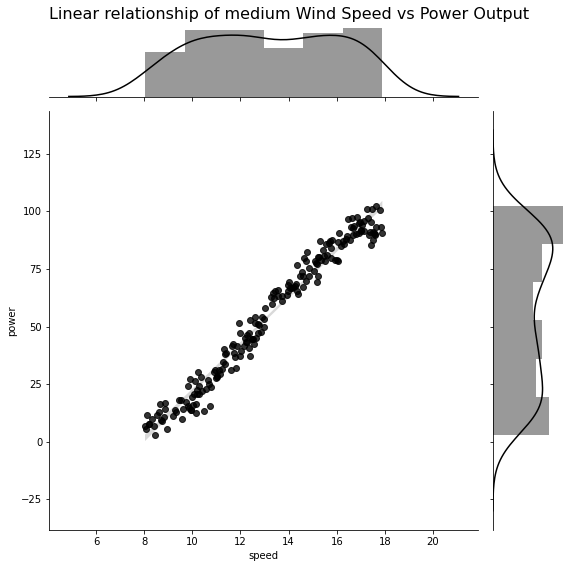

In [23]:
# Plot comparison of medium wind speed versus power output
# Code adapted from https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions 
# and https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
plot = sns.jointplot(x="speed", y="power", kind="reg", color="k", height=8, data=med_speed)

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Linear relationship of medium Wind Speed vs Power Output", fontsize = 16)
# Display plot
plt.show()

### Descriptions of power output observation ranges

#### Low power output ranges

In [24]:
# Describe low power output data points
print("Basic statistics of low power output range (less than 20kW)")
df.loc[(df['power'] <= 20.0)].describe().round(2)

Basic statistics of low power output range (less than 20kW)


,speed,power
count,163.00,163.00
mean,5.42,6.61
std,2.90,4.66
min,0.32,0.07
25%,3.04,2.85
50%,5.71,5.55
75%,7.77,9.63
max,10.74,19.35


#### Medium power output ranges

In [25]:
# Describe medium power output data points
print("Basic statistics of medium power output range (greater than 20kW and less than 85kW)")
df.loc[(df['power'] > 20.0) & (df['power'] < 85.0)].describe().round(2)

Basic statistics of medium power output range (greater than 20kW and less than 85kW)


,speed,power
count,112.00,112.00
mean,12.92,52.66
std,1.73,19.40
min,9.81,20.64
25%,11.56,37.07
50%,12.73,51.31
75%,14.41,69.24
max,16.04,84.13


#### High power output ranges

In [26]:
# Describe high power output data points
print("Basic statistics of high power output range (greater than 85kW)")
df.loc[(df['power'] > 85.0)].describe().round(2)

Basic statistics of high power output range (greater than 85kW)


,speed,power
count,175.00,175.00
mean,20.09,96.80
std,2.57,5.65
min,15.32,85.17
25%,17.81,92.88
50%,19.90,97.15
75%,22.38,100.70
max,24.40,113.56


### Findings of Dataset Investigation

After the zero kW power output and duplicate data points were removed, the dataset appears to give a very well defined S-shaped speed to power relationship curve, which also known as a Sigmoid function curve [1, 8, 10]. For most wind turbines, the cut-in speed is 3 to 4 m/s and the cut-out speed is 25 m/s [4, 11]. Based on the available data for this turbine and my initial review above, I note the following:

* Wind speed needs to be greater than 0.3 m/s to generate any power.
* Up to wind speed of 8 m/s (28% of the data observations), only limited power (mean of 5 kW) can be generated. The lower power is likely due to friction and resistance losses that the wind turbine need to overcome.
* For the medium wind speed range of between 8 m/s and 18 m/s (43% of the data observations), the turbine generates power output directly proportional to the wind speed.
* Above a wind speed of approximately 18 m/s (29% of the data observations), the power output begins to plateau out at a mean power of approximately 100 kW, which appear to be the maximum power output rating of the wind turbine.
* The turbine appears to shut down and stops generating power when wind speed reaches approximately 24.5 m/s.
* The wind speed data value range is almost uniformly distributed.
* The power output data has a greater distribution at the low and high power output ranges.  

***

## Sigmoid Curve Fitting Model of Dataset

The relationship between wind speed and power output can be modelled by fitting logistic or sigmoid function curves to the dataset [1, 8, 9].

The following model uses Scipy curve fitting to fit a sigmoid function curve to the dataset. A sigmoid function is based on the following equation and has an output range of 0 to 1, where 1 is approaching the upper asymptote. i.e. the approximate maximum power output at the upper tail end of the curve [8, 9].

$$S(x) = \frac{1}{1 + e^{-x}}$$

***

### Sigmoid Curve Model Dataset Pre-processing

In [27]:
# Create sigmoid curve df
dfS = df.copy()

# Divide the data into input and output values. Code adapted from https://stackoverflow.com/a/64042705
x_S = dfS['speed'].values
y_S = dfS['power'].values

# Split the dataset into training and test datasets. Code adapted from
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train_S, x_test_S, y_train_S, y_test_S = skms.train_test_split(x_S, y_S, test_size= 0.3, random_state=0)

# Set power output value normalisation scaler values, to approximate upper asymptote [9]
SpoF = 100

# normalise output values
y_train_S = y_train_S / SpoF
y_test_S = y_test_S / SpoF

### Sigmoid Curve Model Training

In [28]:
# Create sigmoid curve model. Code adapted from https://stackoverflow.com/a/4308333 &
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# Define a function for sigmoid output
def sigmoid(x, k, x0):
    """ Function to return scaled (0 to 1) power output based
        on input 'x', a numpy array of wind speed number/s with
        'k' and 'x0' number modifiers from the scipy curve_fit function
    """
    return 1.0 / (1 + np.exp(-k * (x - x0)))

# Fit the training data to the curve
popt, pcov = curve_fit(sigmoid, x_train_S, y_train_S)

# Extract the scipy curve_fit function 'k' and 'x0'
# number modifiers from the fitted curve
est_k, est_x0 = popt

# Predict the fitted curve values for the training and test datasets using
# the extracted scipy curve_fit function 'k' and 'x0'
# number modifiers from the fitted curve
y_train_S_predict = sigmoid(x_train_S, k=est_k, x0=est_x0)*SpoF
y_test_S_predict = sigmoid(x_test_S, k=est_k, x0=est_x0)*SpoF

### Sigmoid Curve Model Testing

In [29]:
# Check Mean Squared error for training and test datasets
print(f"Sigmoid curve fiting Mean Squared Error for training model is {skme.mean_squared_error(y_train_S, y_train_S_predict):.3f}")
print(f"Sigmoid curve fiting Mean Squared Error for testing data is {skme.mean_squared_error(y_test_S, y_test_S_predict):.3f}")

# Testing of the model prediction
print(f"\nWind speed of 20 using the Sigmoid model gives power of: {sigmoid(np.array([20]), k=est_k, x0=est_x0)[0]*SpoF:.3f}")


Sigmoid curve fiting Mean Squared Error for training model is 4378.894
Sigmoid curve fiting Mean Squared Error for testing data is 4202.375

Wind speed of 20 using the Sigmoid model gives power of: 97.894


### Sigmoid Curve Model Display Plots

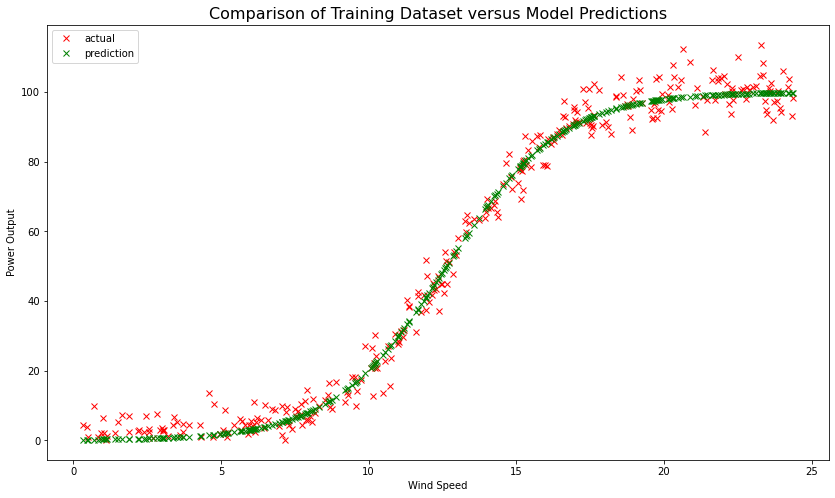

In [30]:
# Plot training dataset comparison
plt.plot(x_train_S, y_train_S*SpoF, 'rx', label='actual')
plt.plot(x_train_S, y_train_S_predict, 'gx', label='prediction')
plt.title("Comparison of Training Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

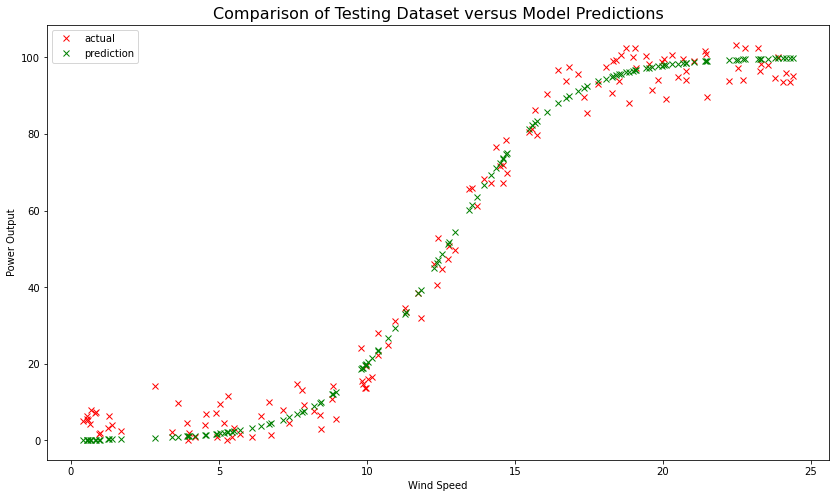

In [31]:
# Plot testing dataset comparison
plt.plot(x_test_S, y_test_S*SpoF, 'rx', label='actual')
plt.plot(x_test_S, y_test_S_predict, 'gx', label='prediction')
plt.title("Comparison of Testing Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

***

## Keras Model of Dataset

An alternative approach to model the speed power curve relationship is to create a machine learning neural network to train a model with the known wind speed inputs and power output values. The following models use the python tensorflow Keras machine learning module to train the models on one part of the dataset and use the remaining part of the dataset to test the model.

***

### Keras Model Dataset Pre-processing

In [32]:
# Normalise the data for use in Keras neural network models

# Set normalisation factors
wsF = 25
poF = 120

# Apply normalisation to the input speeds
dfN = df.copy()
dfN['speed'] = dfN['speed']/wsF
dfN['power'] = dfN['power']/poF

# Divide the data into training and testing sets. Code adapted from
# https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/
# Creating a training dataframe with 70% ratio of
train = dfN.sample(frac = 0.7)
  
# Creating testing dataframe with rest of the 30% values 
test = dfN.drop(train.index)

#### Plot of training and test data

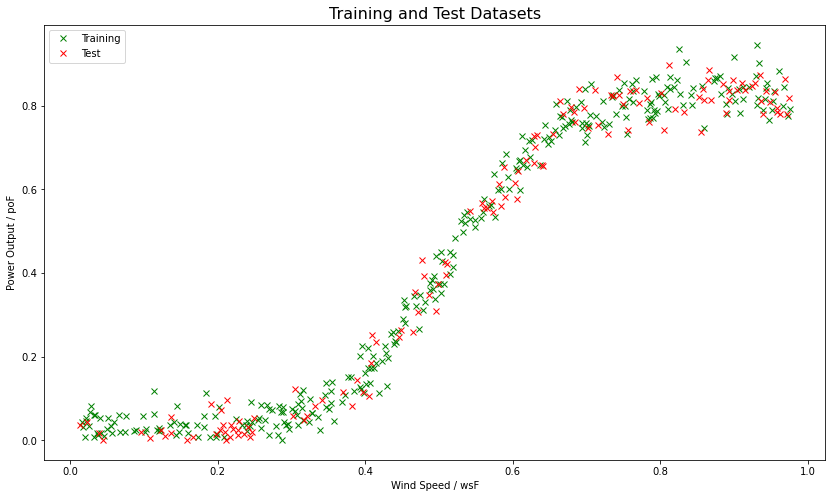

In [33]:
# Plot of training and test data
plt.plot(train['speed'], train['power'], 'gx', label='Training')
plt.plot(test['speed'], test['power'], 'rx', label='Test')
plt.title("Training and Test Datasets", fontsize = 16)
plt.xlabel("Wind Speed / wsF")
plt.ylabel("Power Output / poF")
plt.legend();

***

### Basic Level Keras Main Model

#### Defining Main Model Structure

In [34]:
# Create basic Keras main model Code adpted from https://stackoverflow.com/a/59148584
model = kr.models.Sequential()
# Add 1st Hidden layer
model.add(kr.layers.Dense(10, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Add 2nd Hidden layer
model.add(kr.layers.Dense(10, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Add Output layer
model.add(kr.layers.Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Compile model
model.compile('adam', loss='mean_squared_error')
print("Keras Main Model Summary")
print("============================")
model.summary()

Keras Main Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


#### Keras Main Model Training

In [35]:
# Train the Keras main model on the training dataset.
history = model.fit(train['speed'], train['power'], epochs=500, batch_size=10)

Epoch 1/500
32/32 [==============================] - 5s 5ms/step - loss: 0.3355
Epoch 2/500
32/32 [==============================] - 0s 4ms/step - loss: 0.2763
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 0.2427
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.2102
Epoch 5/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1617
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1349
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1165
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1145
Epoch 9/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1128
Epoch 10/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1181
Epoch 11/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1088
Epoch 12/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1145
Epoch 13/500
32/32 [=================

32/32 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 102/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 103/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 104/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 105/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 106/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 107/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 108/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 109/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 110/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 111/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 112/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 113/500
32/32 [=========

32/32 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 201/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 202/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 203/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 204/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 205/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 206/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 207/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 208/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 209/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 210/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 211/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 212/500
32/32 [=========

32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 299/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 300/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 301/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 302/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 303/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 304/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 305/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 306/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 307/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 308/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 309/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 310/500
32/32 [=========

32/32 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 399/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 400/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 401/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 402/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 403/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 404/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 405/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 406/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 407/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0014A: 0s - loss: 0.00
Epoch 408/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 409/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 410/50

32/32 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 498/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 499/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 500/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0014


#### Keras Main Model Review

In [36]:
print(f"The final scaled Mean Squared Error cost/loss factor in the Keras main model training dataset is {history.history['loss'][-1]}")

The final scaled Mean Squared Error cost/loss factor in the Keras main model training dataset is 0.0013702430296689272


#### Keras Main Model data prediction plots

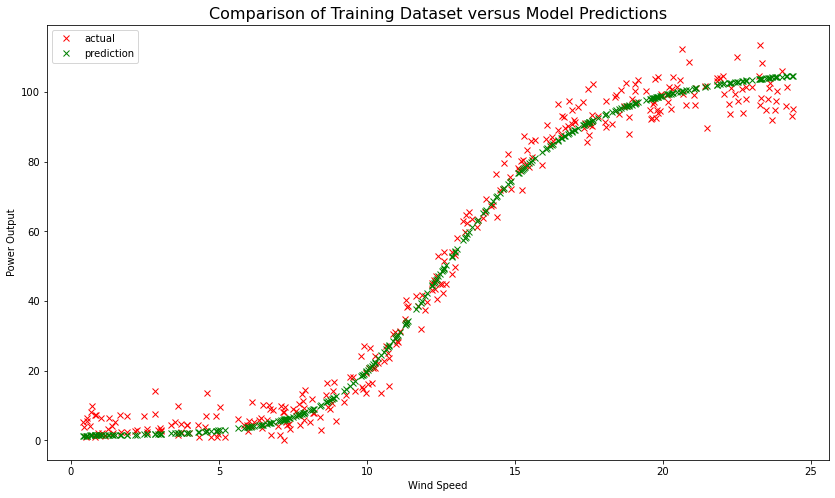

In [37]:
# Plot training dataset comparison
plt.plot(train['speed']*wsF, train['power']*poF, 'rx', label='actual')
plt.plot(train['speed']*wsF, model.predict(train['speed'])*poF, 'gx', label='prediction')
plt.title("Comparison of Training Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

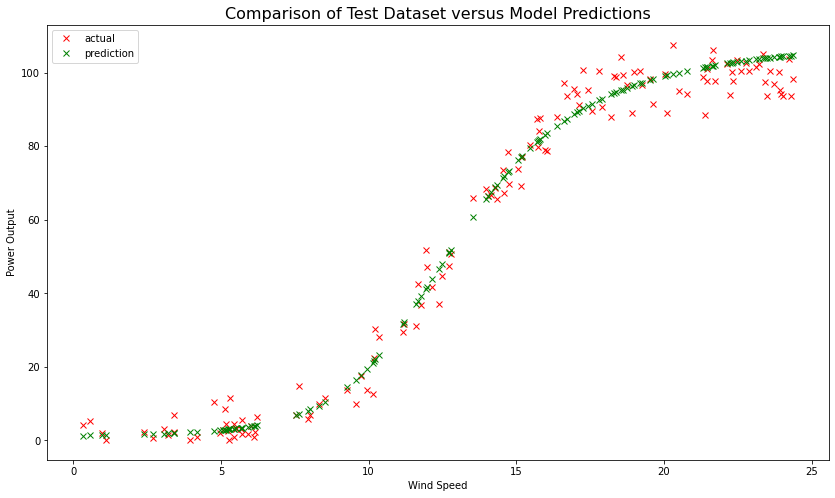

In [38]:
# Plot testing dataset comparison
plt.plot(test['speed']*wsF, test['power']*poF, 'rx', label='actual')
plt.plot(test['speed']*wsF, model.predict(test['speed'])*poF, 'gx', label='prediction')
plt.title("Comparison of Test Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

***

### Alternative Deep Learning Keras Model

#### Defining Alternative Keras Model Structure

In [39]:
# Create Alternative deep learning Keras model
model_alt1 = kr.models.Sequential()
# Add 1st Hidden layer
model_alt1.add(kr.layers.Dense(50, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Add 2nd Hidden layer
model_alt1.add(kr.layers.Dense(50, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Add 3rd Hidden layer
model_alt1.add(kr.layers.Dense(10, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Add Output layer
model_alt1.add(kr.layers.Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

# Compile model
model_alt1.compile('adam', loss='mean_squared_error')
print("Alternative Keras Model Summary")
print("============================")
model_alt1.summary()

Alternative Keras Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 3,171
Trainable params: 3,171
Non-trainable params: 0
_________________________________________________________________


#### Alternative Keras Model Training

In [40]:
# Train the alternative Keras model on the training dataset.
history_alt1 = model_alt1.fit(train['speed'], train['power'], epochs=100, batch_size=10)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.2037
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1303
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1227
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1143
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1106
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1071
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1131
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1144
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1139
Epoch 11/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1126
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1121
Epoch 13/100
32/32 [=================

32/32 [==============================] - 0s 4ms/step - loss: 0.0012


#### Alternative Keras Model Review

In [41]:
print(f"The final scaled Mean Squared Error cost/loss factor in the Alternate Keras model training dataset is {history_alt1.history['loss'][-1]}")

The final scaled Mean Squared Error cost/loss factor in the Alternate Keras model training dataset is 0.0011928791645914316


***

### Testing of Keras models

In [42]:
# Testing of the model prediction
print(f"Wind speed of 20 using the Keras Main model gives power of: {round(model.predict([20/wsF])[0][0]*poF, 3)}")
print(f"Wind speed of 20 using the Keras Alt. model gives power of: {round(model_alt1.predict([20/wsF])[0][0]*poF, 3)}")

Wind speed of 20 using the Keras Main model gives power of: 98.979
Wind speed of 20 using the Keras Alt. model gives power of: 97.6


***

### Function for predicting power output using Keras Main Model

#### Definition of Keras model function

In [43]:
# Function to predict power output based on inputted wind speeds using Keras Main Model
def power_output(windspeeds):
    """ Function to predict power output based on inputted wind speeds
        Acceptable inputs include a number or a list of numbers
    """
    # Set the cut in/off wind speeds
    minWS, maxWS = 3, 24.5
        
    # If input is a list of numbers
    if type(windspeeds) == list:
        # Scale inputted wind speeds
        # Code adapted from https://stackoverflow.com/a/8244975
        wsScaled = [i/wsF for i in windspeeds]
        # Result list of estimated power output
        res = model.predict(wsScaled).reshape(-1).tolist()
        # For each item in the list
        for i in range(len(windspeeds)):
            # If wind speed is in allowable range for cut in/off
            if windspeeds[i] > minWS and windspeeds[i] < maxWS:
                # Round result and scale up
                res[i] = round(res[i]*poF, 3)
            else:
                # Otherwise set power output to zero
                res[i] = 0
        return res
    
    # If input is a single number
    else:
        # If wind speed is in allowable range for cut in/off
        if windspeeds > minWS and windspeeds < maxWS:
            ws = np.array([windspeeds])
            # Estimate power output
            return round(model.predict(ws/wsF)[0][0]*poF, 3)
        else:
            # Otherwise set power output to zero
            return 0

#### Testing of Keras model function

In [44]:
# Testing of function for single number values
ws_arr_test = [1, 3, 3.001, 5, 10, 20, 24, 24.499, 24.5, 27]
for i in ws_arr_test:
    print(f"Wind speed: {i} gives power: {power_output(i)}")
    
# Testing of function for list of numbers
print(f"\nWind speeds: {ws_arr_test}\nPower outputs: {power_output(ws_arr_test)}")

Wind speed: 1 gives power: 0
Wind speed: 3 gives power: 0
Wind speed: 3.001 gives power: 1.831
Wind speed: 5 gives power: 2.825
Wind speed: 10 gives power: 19.995
Wind speed: 20 gives power: 98.979
Wind speed: 24 gives power: 104.396
Wind speed: 24.499 gives power: 104.785
Wind speed: 24.5 gives power: 0
Wind speed: 27 gives power: 0

Wind speeds: [1, 3, 3.001, 5, 10, 20, 24, 24.499, 24.5, 27]
Power outputs: [0, 0, 1.831, 2.825, 19.995, 98.979, 104.396, 104.785, 0, 0]


***

### Saving the Keras Main Model

In [45]:
# Save the Keras model h5 files "my_model.json".
# Code adapted from https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html
model.save("my_model.h5")
print("Saved model to disk")

Saved model to disk


***

## Reference

[1] How effectively a Sigmoid function curve can be fitted with a scaled Weibull Cumulative Distribution Function (CDF)?; Dr. Neeraj Dhanraj Bokde - Aarhus University, Denmark; https://towardsdatascience.com/how-effectively-a-sigmoid-function-curve-can-be-fitted-with-a-scaled-weibull-cumulative-6f3a3dd7f19f

[2] Beaufort Wind Scale; Dr. Neal Pettigrew - The University of Maine; http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed

[3] Wind energy's frequently asked questions (FAQ) - How efficient are wind turbines? & Why do some of the turbines in a wind farm sometimes stand still? & How is electricity measured?; EWEA; https://www.ewea.org/wind-energy-basics/faq/#:~:text=The%20output%20of%20a%20wind,average%20EU%20households%20with%20electricity.

[4] Power control - Wind turbine design; Wikipedia; https://en.wikipedia.org/wiki/Wind_turbine_design

[5] Data cleaning; The benefits and steps to creating and using clean data; Tableau Software, Seattle, USA; https://www.tableau.com/learn/articles/what-is-data-cleaning

[6] TURBINE OPERATION/ENERGY OUTPUT; Kees van Kuijen - TU Delft, Netherlands; http://mstudioblackboard.tudelft.nl/duwind/Wind%20energy%20online%20reader/Static_pages/power_curve.htm

[7] Keras; https://keras.io/

[8] Sigmoid function; Wikipedia; https://en.wikipedia.org/wiki/Sigmoid_function

[9] S-Curve or Logistic Function; Areppim AG - Switzerland; https://stats.areppim.com/glossaire/scurve_def.htm

[10] Logistic Growth (S-curves); Foresight University; http://www.foresightguide.com/logistic-growth-s-curves/

[11] How Do Wind Turbines Survive Severe Storms?; Office of ENERGY EFFICIENCY & RENEWABLE ENERGY - USA; https://www.energy.gov/eere/articles/how-do-wind-turbines-survive-severe-storms